In [2]:
import os
import cv2
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [3]:
#load the dataset
data = pd.read_csv("./Handwritten_Data.csv").astype('float32')
#show its head
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#rename the class column
data.rename(columns={'0':'label'}, inplace=True)
#show the top 5 rows 
data.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# how many labels do we have 
data.label.nunique()

26

Features SHAPE :(372450, 784)
Class Column SHAPE :(372450,)


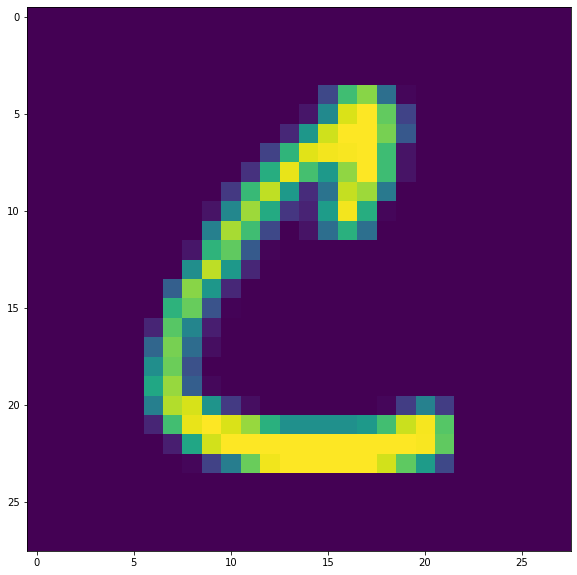

In [6]:
# Split data to Features X and labels y
x = data.drop('label',axis = 1)
y = data.label

#get the shape of labels and features 
print(f'Features SHAPE :{x.shape}')
print(f'Class Column SHAPE :{y.shape}')

plt.figure(figsize = (12,10))
plt.imshow(x.iloc[30000].values.reshape(28,28))
plt.show()

In [7]:
#split into train and test set 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((297960, 784), (74490, 784), (297960,), (74490,))

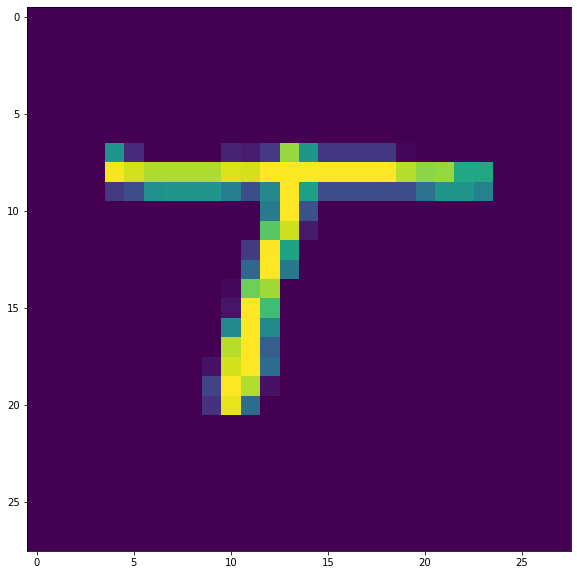

In [8]:
# scale data
scaler = MinMaxScaler()
scaler.fit(train_x)
#scaling data 
train_x= scaler.transform(train_x)
test_x = scaler.transform(test_x)

plt.figure(figsize = (12,10))
plt.imshow(train_x[0].reshape(28,28))
plt.show()

In [9]:
#reshape the data
train_x_reshaped = np.reshape(train_x, (train_x.shape[0], 28,28, 1)).astype('float32')
test_x_reshaped = np.reshape(test_x, (test_x.shape[0], 28,28, 1)).astype('float32')
print("Train data shape: ", train_x_reshaped.shape)
print("Test data shape: ", test_x_reshaped.shape)

Train data shape:  (297960, 28, 28, 1)
Test data shape:  (74490, 28, 28, 1)


In [10]:
#convert labels to categorical
train_y = np_utils.to_categorical(train_y,num_classes=26,dtype=int)
test_y = np_utils.to_categorical(test_y,num_classes=26,dtype=int)
train_y.shape,test_y.shape

((297960, 26), (74490, 26))

In [11]:
#define a mapping dict 
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

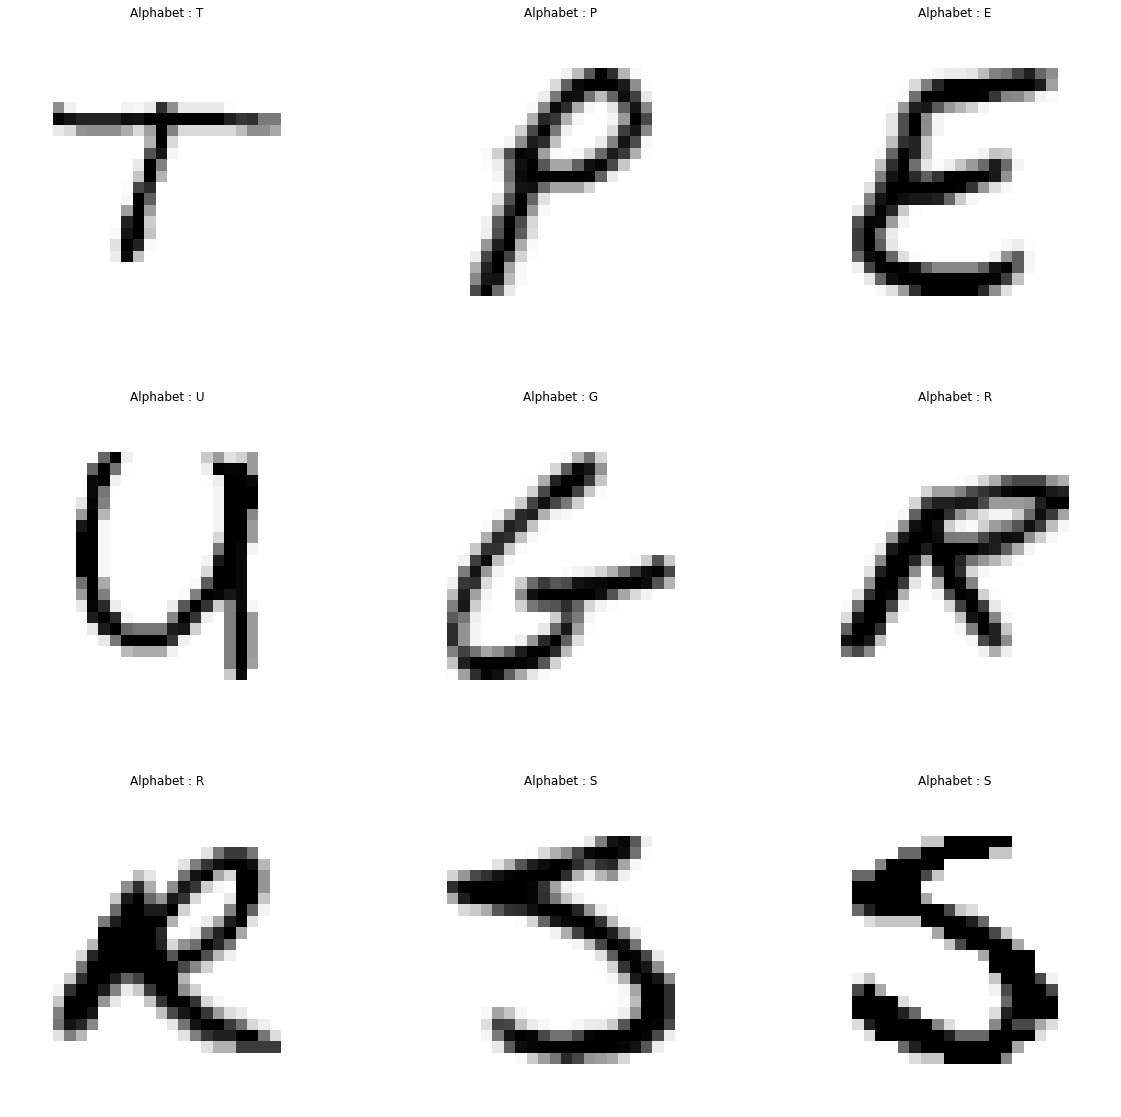

In [12]:
#show 
fig, axis = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(train_x_reshaped[i].reshape(28,28), cmap="Greys")
    ax.axis('off')
    ax.set(title = f"Alphabet : {letters_dict[train_y[i].argmax()]}")

In [13]:
#build the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

#flatten into a vector of single dimension
model.add(Flatten())

#given as an input to the ddense layer (fully connected network)
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

#output layer 
model.add(Dense(26,activation ="softmax"))

#compile 
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [14]:
history = model.fit(train_x_reshaped, train_y, epochs=1,  validation_data = (test_x_reshaped,test_y))

9312/9312 [==============================] - 140s 15ms/step - loss: 0.2905 - accuracy: 0.9171 - val_loss: 0.0566 - val_accuracy: 0.9842


In [15]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

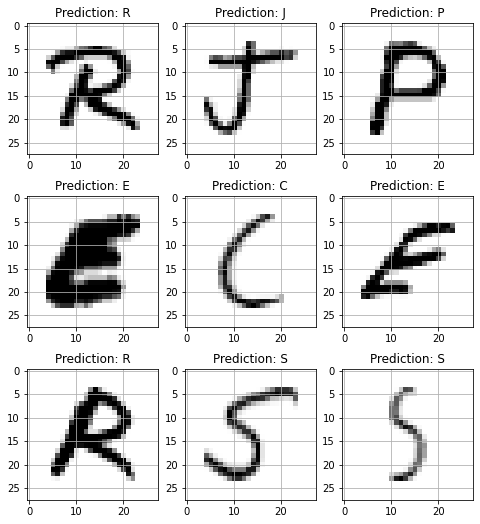

In [17]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_x[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letters_dict[np.argmax(test_y[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
#Put the path of the image here.
img = cv2.imread('')
img_copy = img.copy()

#Convert BGR representation to RGB and resize the image.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
#Convert and resize the copied image to use as a model input.
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()